### Homework 8
#### Exercise 2

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.stats import multivariate_normal, norm
from numpy import matlib

In [9]:
z = np.arange(-10,10)
a =[0,0.1,1,2,1000]

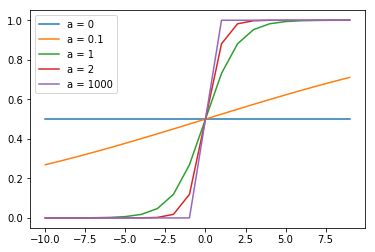

In [11]:
fig = plt.figure()
sp = [231,232,233,234,235,236]
for i in range(5):
    #plt.subplot(sp[i])
    plt.plot(z, 1/(1+ np.exp(-a[i]*z)), label = "a = %s"%a[i])
    plt.legend()
plt.show()

#### Exercise 4

Import data. Then calculate probabilities for each class.

In [4]:
Dataset = sio.loadmat('HW8.mat')
train_x = Dataset['train_x']
train_y= Dataset['train_y']

test_x = Dataset['test_x']
test_y = Dataset['test_y']

In [5]:
#positions of class 1 and 2 as T/F
indx = []
indx.append((train_y==1).reshape(len(train_y)))
indx.append((train_y==2).reshape(len(train_y)))

In [6]:
#calculate probabiblities
n_i = np.append(np.count_nonzero(indx[0]), np.count_nonzero(indx[1]))
n = np.sum(n_i)

p = np.append(n_i[0]/n, n_i[1]/n)

print("P1= %.2f, P2= %.2f \nTherefore classes are equiprobable."%(p[0], p[1]))

P1= 0.50, P2= 0.50 
Therefore classes are equiprobable.


In [7]:
def error(pred, true):
    sum = 0
    for i in range(200):
        if pred[i] != true[i]:
            sum+=1
    return(sum/len(test_x))

(a) Bayesian classifier

In [8]:
#calculations of mean and covariance matrices
m = []
s = []

for i in range(2):
    m.append(np.mean(train_x[indx[i],:],0))
    s.append(1/n_i[i]*((train_x[indx[i],:] - np.matlib.repmat(m[i],n_i[i],1)).T).dot((train_x[indx[i],:] - np.matlib.repmat(m[i],n_i[i],1))))


In [9]:
#scores calculation
scores = []

for i in range(2):
    scores.append(multivariate_normal(m[i],s[i]).pdf(test_x)*p[i])

In [10]:
#classify x_test based on calssifier
Btest_y = np.zeros((n,1))
for i in range(n):
    if scores[0][i]>scores[1][i]:
        Btest_y[i] = 1
    else:
        Btest_y[i] = 2

In [11]:
eb = error(Btest_y, test_y)
print("Error of Bayesian classifier is %.2f"%eb)

Error of Bayesian classifier is 0.15


(b) Naive Bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

# Train
model.fit(train_x, train_y.ravel())

#Predict
Btest_y = model.predict(test_x)

In [13]:
enb = error(Btest_y, test_y)
print("Error of Bayesian classifier is %.3f"%enb)

Error of Bayesian classifier is 0.165


(c) K-NN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 5)

#Train
model.fit(train_x, train_y.ravel())

#Predict
Btest_y = model.predict(test_x).reshape(len(test_x),1)

In [15]:
eknn = error(Btest_y, test_y)
print("Error of KNN classifier is %.2f"%eknn)

Error of KNN classifier is 0.17


(d) Logistic regression

In [16]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 0, solver = "lbfgs")

#Train
model.fit(train_x, train_y.ravel())

#Predict
Btest_y = model.predict(test_x).reshape(len(test_x),1)

In [17]:
elr = error(Btest_y, test_y)
print("Error of Logistic Regression classifier is %.3f"%elr)

Error of Logistic Regression classifier is 0.155


(e) Depict graphically training set

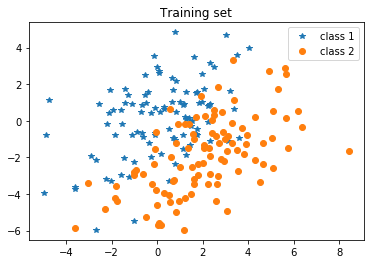

In [18]:
plt.plot(train_x[indx[0],0],train_x[indx[0],1],'*',label='class 1')
plt.plot(train_x[indx[1],0],train_x[indx[1],1],'o',label='class 2')
plt.title('Training set')
plt.legend()
plt.show()

(f) Comment on results

In [20]:
print("Errors")
print("-Bayes:", eb)
print("-Naive Bayes:", enb)
print("-K-NN:", eknn)
print("-Logistic regression: ", elr)

Errors
-Bayes: 0.15
-Naive Bayes: 0.165
-K-NN: 0.17
-Logistic regression:  0.155


By looking at the errors we can see that the Bayes classifier gives the best results. Thus the Naive Bayes' assumption about the independance between the features is wrong. Although it is wrong, the results obtained by Naive Bayes are only slightly worse than Bayes'. Since Logistic Regression's results lay close to Bayes' we could say that the assumption of linearly seperable classes of Logistic Regression seems to be valid.